Libraries





In [ ]:
import os
from pathlib import Path
import pandas as pd
import shutil
import re

I thought the images were ordered as they appear in the folder,so i changed the image's names with 1,2,3,....


In [ ]:
n = 1
for imfile in os.scandir(imdir):
    os.rename(imfile.path, os.path.join(imdir, '{:06}.jpg'.format(n)))
    print(file)
    n+=1

But didn't work because the model take the image number 814 instead of first


I try another way


In [ ]:
n=1
for file in os.listdir("/home/chaac/Neural_networks_raggi/Birds/prueba/"):
    os.rename(file,str(n))
    print(file)
    n+=1

And did not work, but this method work.

In [ ]:
n=1
for count, filename in enumerate(sorted(os.listdir(imdir)), start=1):
    os.rename("/home/chaac/Neural_networks_raggi/Birds/prueba/"+str(filename), os.path.join(imdir, '{0}.jpg'.format(n)))
    n+=1

To move the images to the train and test folder, i loaded the txt to watch if an images belong to the train and test folder.

In [ ]:
tt = pd.read_table("train_test_split.txt",sep=" ",header=None)
clase = tt.iloc[:,1].values
ind = tt.iloc[:,0].values


I create traaian and test folder
Cree las carpetas de train y test

In [ ]:
os.mkdir("/home/chaac/Neural_networks_raggi/Birds/prueba/train")
os.mkdir("/home/chaac/Neural_networks_raggi/Birds/prueba/test")

I had the same results

I create an array with the length of images to use shutil

In [ ]:
imagenes =[]
n=0
for i in range(1,len(files)+1):
    a = str(i)+".jpg"
    n+=1
    imagenes.append(a)
print(imagenes)

I change the images to different folders using the train_test_split dataset

In [ ]:
for i in range(0,len(files)):#training 1
    imagen = str(i+1)+".jpg"
    clase[i]
    if clase[i] == 1:
            shutil.move("/home/chaac/Neural_networks_raggi/Birds/prueba/"+imagen, '/home/chaac/Neural_networks_raggi/Birds/prueba/train')
    if clase[i] == 0:
            shutil.move("/home/chaac/Neural_networks_raggi/Birds/prueba/"+imagen, '/home/chaac/Neural_networks_raggi/Birds/prueba/test')
        

I noticed i was wrong so i start over


I loaded the dataset with the information about the images.

In [ ]:
nombres = pd.read_table("images.txt",sep=" ",header=None)
names = nombres.iloc[:,1].values
names


I modify the string to get the image name


In [ ]:
for i in range(0,len(names)):
    stri = names[i]
    stri = re.sub(r'^.*?/', '', stri)
    names[i] = stri


I reloaded the txt with the train/test info. 

In [ ]:
tt = pd.read_table("train_test_split.txt",sep=" ",header=None)
tt["nombres"] = names

In [ ]:
nombres2 = pd.read_table("images.txt",sep=" ",header=None)

folder = nombres2.iloc[:,1].values
for i in range(0,len(folder)):
    stri= folder[i]
    stri = stri[4:]
    folder[i] = stri

print(folder)

In [ ]:
new_folder=[]
for i in range(0,len(folder)):
    stri= folder[i]
    splitstring = stri.split("/",1)
    new_folder.append(splitstring[0])

new_folder

In [ ]:
tt["Folder"] = new_folder
tt

In [ ]:
tt.to_csv("Completo.csv")

In [ ]:
clases = bueno.iloc[:,2].values
imageness = bueno.iloc[:,3].values
carpeta = bueno.iloc[:,4].values
os.mkdir("/home/chaac/Neural_networks_raggi/Birds/prueba2/train")
os.mkdir("/home/chaac/Neural_networks_raggi/Birds/prueba2/test")

In [ ]:
for i in range(0,len(clases)):
    clase = clases[i]
    imagen = imageness[i]
    if clase == 1:
        shutil.move("/home/chaac/Neural_networks_raggi/Birds/prueba2/"+imagen, '/home/chaac/Neural_networks_raggi/Birds/prueba2/train')
    if clase == 0:
        shutil.move("/home/chaac/Neural_networks_raggi/Birds/prueba2/"+imagen, '/home/chaac/Neural_networks_raggi/Birds/prueba2/test')
    

In [ ]:
lista_folder= bueno.Folder.unique()
len(lista_folder)
for i in range(0,len(lista_folder)):
    os.mkdir("/home/chaac/Neural_networks_raggi/Birds/prueba2/train/"+str(lista_folder[i]))

    

In [ ]:
for i in range(0,len(lista_folder)):
    os.mkdir("/home/chaac/Neural_networks_raggi/Birds/prueba2/test/"+str(lista_folder[i]))

In [ ]:
for i in range(0,len(clases)):
    clase = clases[i]
    imagen = imageness[i]
    folder = carpeta[i]
    if clase == 1:
        shutil.move("/home/chaac/Neural_networks_raggi/Birds/prueba2/train/"+imagen, "/home/chaac/Neural_networks_raggi/Birds/prueba2/train/"+folder)
    if clase == 0:
        shutil.move("/home/chaac/Neural_networks_raggi/Birds/prueba2/test/"+imagen, "/home/chaac/Neural_networks_raggi/Birds/prueba2/test/"+folder)
    

In [ ]:
import zipfile as zf
files = zf.ZipFile("pruebas.zip",'r')
files.extractall()
files.close()

In [ ]:
import fastai.vision.all as fv
import torch
from pathlib import Path


First try

In [ ]:
!ls prueba2

train  valid


In [ ]:
!ls prueba2/train

Acadian_Flycatcher		Lazuli_Bunting
American_Crow			Le_Conte_Sparrow
American_Goldfinch		Least_Auklet
American_Pipit			Least_Flycatcher
American_Redstart		Least_Tern
American_Three_toed_Woodpecker	Lincoln_Sparrow
Anna_Hummingbird		Loggerhead_Shrike
Artic_Tern			Long_tailed_Jaeger
Baird_Sparrow			Louisiana_Waterthrush
Baltimore_Oriole		Magnolia_Warbler
Bank_Swallow			Mallard
Barn_Swallow			Mangrove_Cuckoo
Bay_breasted_Warbler		Marsh_Wren
Belted_Kingfisher		Mockingbird
Bewick_Wren			Mourning_Warbler
Black_Tern			Myrtle_Warbler
Black_and_white_Warbler		Nashville_Warbler
Black_billed_Cuckoo		Nelson_Sharp_tailed_Sparrow
Black_capped_Vireo		Nighthawk
Black_footed_Albatross		Northern_Flicker
Black_throated_Blue_Warbler	Northern_Fulmar
Black_throated_Sparrow		Northern_Waterthrush
Blue_Grosbeak			Olive_sided_Flycatcher
Blue_Jay			Orange_crowned_Warbler
Blue_headed_Vireo		Orchard_Oriole
Blue_winged_Warbler		Ovenbird
Boat_tailed_Grackle		Pacific_Loon
Bobolink			Painted_Bunting
Bohemian_Waxwing		Pa

In [ ]:
!ls prueba2/valid

Acadian_Flycatcher		Lazuli_Bunting
American_Crow			Le_Conte_Sparrow
American_Goldfinch		Least_Auklet
American_Pipit			Least_Flycatcher
American_Redstart		Least_Tern
American_Three_toed_Woodpecker	Lincoln_Sparrow
Anna_Hummingbird		Loggerhead_Shrike
Artic_Tern			Long_tailed_Jaeger
Baird_Sparrow			Louisiana_Waterthrush
Baltimore_Oriole		Magnolia_Warbler
Bank_Swallow			Mallard
Barn_Swallow			Mangrove_Cuckoo
Bay_breasted_Warbler		Marsh_Wren
Belted_Kingfisher		Mockingbird
Bewick_Wren			Mourning_Warbler
Black_Tern			Myrtle_Warbler
Black_and_white_Warbler		Nashville_Warbler
Black_billed_Cuckoo		Nelson_Sharp_tailed_Sparrow
Black_capped_Vireo		Nighthawk
Black_footed_Albatross		Northern_Flicker
Black_throated_Blue_Warbler	Northern_Fulmar
Black_throated_Sparrow		Northern_Waterthrush
Blue_Grosbeak			Olive_sided_Flycatcher
Blue_Jay			Orange_crowned_Warbler
Blue_headed_Vireo		Orchard_Oriole
Blue_winged_Warbler		Ovenbird
Boat_tailed_Grackle		Pacific_Loon
Bobolink			Painted_Bunting
Bohemian_Waxwing		Pa

In [ ]:
birds = Path("prueba2/")

In [ ]:
(birds/"train").ls()


(#200) [Path('prueba2/train/Black_footed_Albatross'),Path('prueba2/train/Laysan_Albatross'),Path('prueba2/train/Sooty_Albatross'),Path('prueba2/train/Groove_billed_Ani'),Path('prueba2/train/Crested_Auklet'),Path('prueba2/train/Least_Auklet'),Path('prueba2/train/Parakeet_Auklet'),Path('prueba2/train/Rhinoceros_Auklet'),Path('prueba2/train/Brewer_Blackbird'),Path('prueba2/train/Red_winged_Blackbird')...]

I got some errors

In [ ]:
(birds/"valid").ls()


(#200) [Path('prueba2/valid/Rhinoceros_Auklet'),Path('prueba2/valid/Brewer_Blackbird'),Path('prueba2/valid/Red_winged_Blackbird'),Path('prueba2/valid/Rusty_Blackbird'),Path('prueba2/valid/Yellow_headed_Blackbird'),Path('prueba2/valid/Bobolink'),Path('prueba2/valid/Indigo_Bunting'),Path('prueba2/valid/Lazuli_Bunting'),Path('prueba2/valid/Painted_Bunting'),Path('prueba2/valid/Cardinal')...]

In [ ]:
files = fv.get_image_files("prueba2"); files


(#11788) [Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0080_796096.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0060_796076.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0057_796106.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0069_796139.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0081_426.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0067_170.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg')...]

In [ ]:
fv.doc(fv.get_image_files)


In [ ]:
fv.doc(fv.aug_transforms)


I set max_rotate = 10 because i don't want flipped birds

In [ ]:
def load_data(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=True, max_rotate=10, max_lighting=0.25,max_zoom=1.2,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = fv.parent_label,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
data = load_data(birds, img_size=224, batch_size=128)


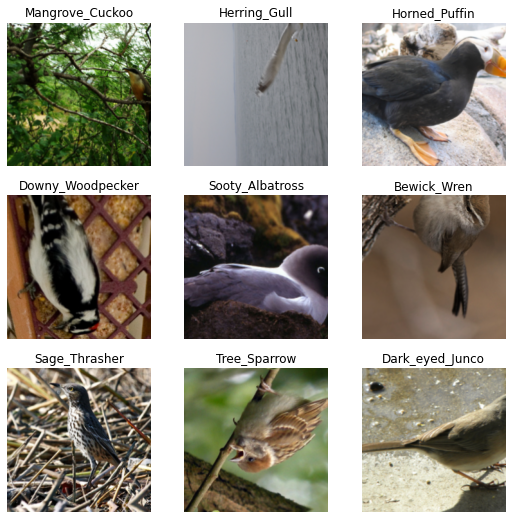

In [ ]:
data.show_batch()


In [ ]:
x,y = data.one_batch()


In [ ]:
x.shape


torch.Size([128, 3, 224, 224])

In [ ]:
y.shape


torch.Size([128])

In [ ]:
learner = fv.cnn_learner(data, fv.resnet18, metrics = fv.accuracy)


In [ ]:
learner.summary()

Sequential (Input shape: ['128 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               128 x 64 x 112 x 11  9,408      False     
________________________________________________________________
BatchNorm2d          128 x 64 x 112 x 11  128        True      
________________________________________________________________
ReLU                 128 x 64 x 112 x 11  0          False     
________________________________________________________________
MaxPool2d            128 x 64 x 56 x 56   0          False     
________________________________________________________________
Conv2d               128 x 64 x 56 x 56   36,864     False     
________________________________________________________________
BatchNorm2d          128 x 64 x 56 x 56   128        True      
________________________________________________________________
ReLU                 128 x 64 x 56 x 56   0          False     
________________________________________________

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.019054606556892395)

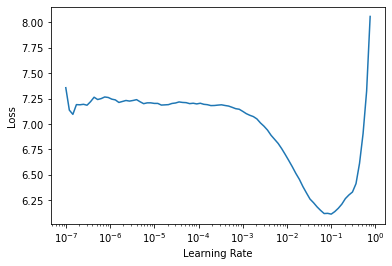

In [ ]:
learner.lr_find()


I got None in accuracy and i didn't know why

In [ ]:
learner.fit_one_cycle(3,lr_max=1e-2)

In [ ]:
learner = fv.cnn_learner(data, fv.resnet34, metrics=fv.accuracy, opt_func=fv.ranger)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.0691830962896347)

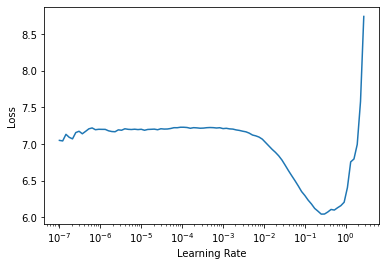

In [ ]:
learner.lr_find()


In [ ]:
learner.fit_one_cycle(3,lr_max=1e-2)

My error was the name of the folder i named test and need to be valid


In [ ]:
learner = fv.cnn_learner(data, fv.resnet18, metrics = fv.accuracy)


SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.013182567432522774)

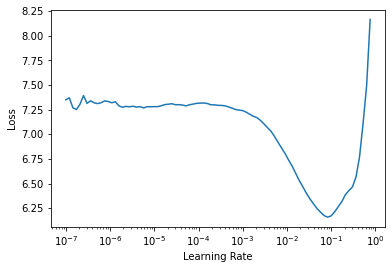

In [ ]:
learner.lr_find()


In [ ]:
learner.fit_one_cycle(3,lr_max=1e-2)

In [ ]:
learner.unfreeze()

SuggestedLRs(lr_min=6.918309736647643e-07, lr_steep=4.786300905834651e-06)

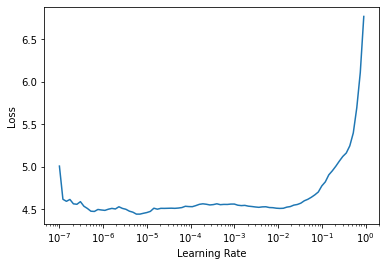

In [ ]:
learner.lr_find()

In [ ]:
learner.fit_one_cycle(3,lr_max=1e-4)

I change flip_vert to False  

In [ ]:
def load_data(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=False, max_rotate=10, max_lighting=0.25,max_zoom=1.2,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = fv.parent_label,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
data = load_data(birds, img_size=224, batch_size=128)

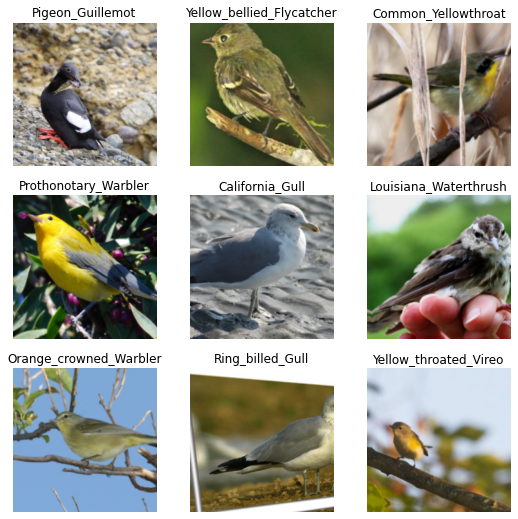

In [ ]:
data.show_batch()


SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.015848932787775993)

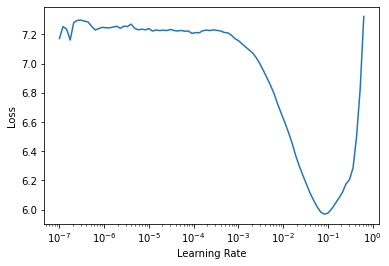

In [ ]:
learner = fv.cnn_learner(data, fv.resnet18, metrics = fv.accuracy)
learner.lr_find()

In [ ]:
learner.fit_one_cycle(3,lr_max=1e-2)

Now i try different batch sizes

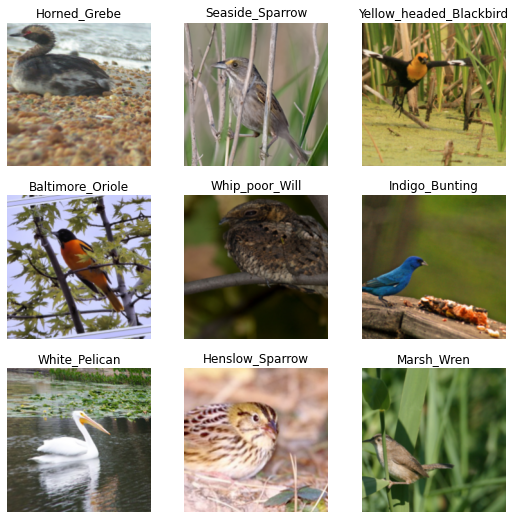

In [ ]:
data = load_data(birds, img_size=224, batch_size=32)
data.show_batch()

SuggestedLRs(lr_min=0.003981071710586548, lr_steep=0.02290867641568184)

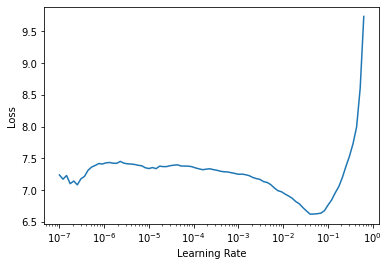

In [ ]:
learner = fv.cnn_learner(data, fv.resnet18, metrics = fv.accuracy)
learner.lr_find()

In [ ]:
learner.fit_one_cycle(3,lr_max=1e-2)

With size 32 increasae accuracy, now lets try with 64

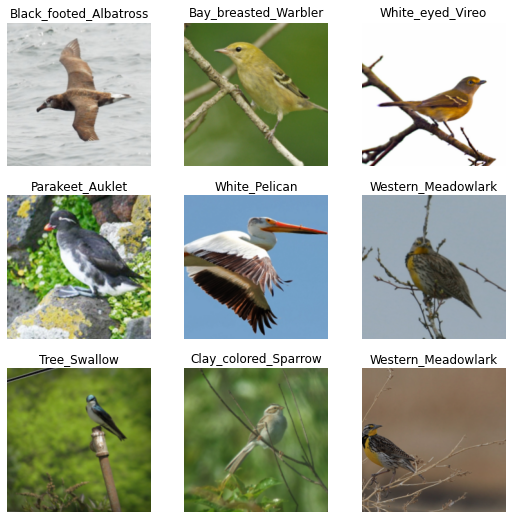

In [ ]:
data = load_data(birds, img_size=224, batch_size=64)
data.show_batch()

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.013182567432522774)

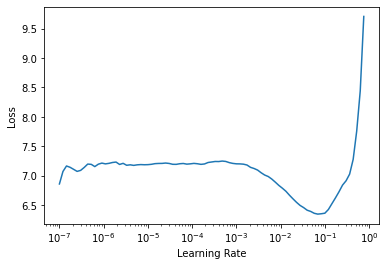

In [ ]:
learner = fv.cnn_learner(data, fv.resnet18, metrics = fv.accuracy)
learner.lr_find()

In [ ]:
learner.fit_one_cycle(3,lr_max=1e-2)

the accuracy did not go up 

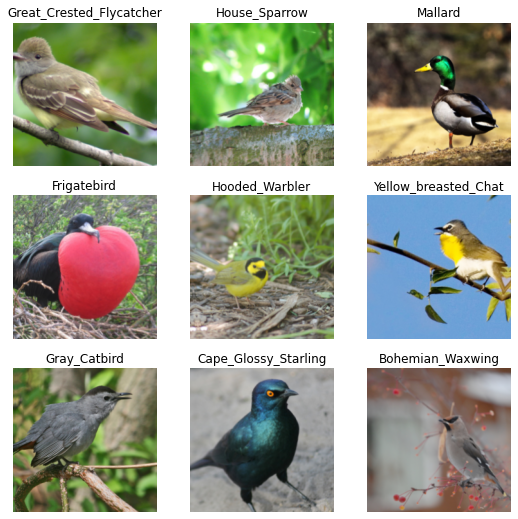

In [ ]:
data = load_data(birds, img_size=224, batch_size=96)
data.show_batch()

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.010964781977236271)

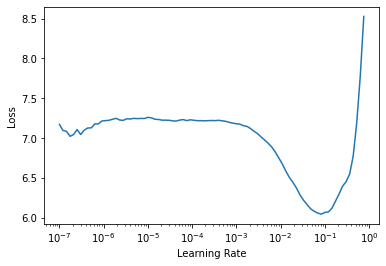

In [ ]:
learner = fv.cnn_learner(data, fv.resnet18, metrics = fv.accuracy)
learner.lr_find()

In [ ]:
learner.fit_one_cycle(3,lr_max=1e-2)

let's try 160

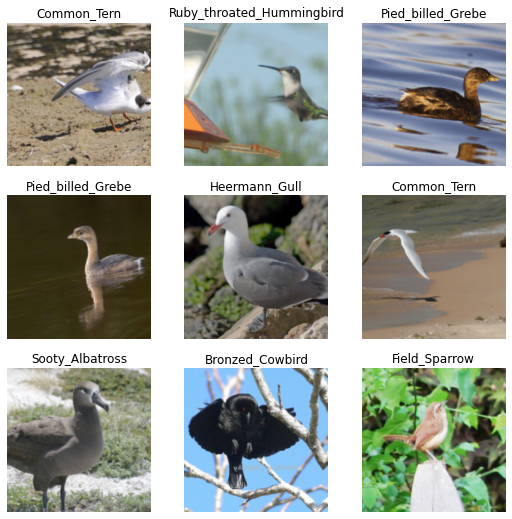

In [ ]:
data = load_data(birds, img_size=224, batch_size=160)
data.show_batch()

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.013182567432522774)

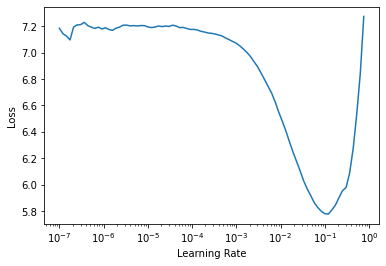

In [ ]:
learner = fv.cnn_learner(data, fv.resnet18, metrics = fv.accuracy)
learner.lr_find()

In [ ]:
learner.fit_one_cycle(3,lr_max=1e-2)

The batch size was 32

Let's try with zoom = 1.0

In [ ]:
def load_data(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=False, max_rotate=10, max_lighting=0.25,max_zoom=1.0,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = fv.parent_label,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
data = load_data(birds, img_size=224, batch_size=32)

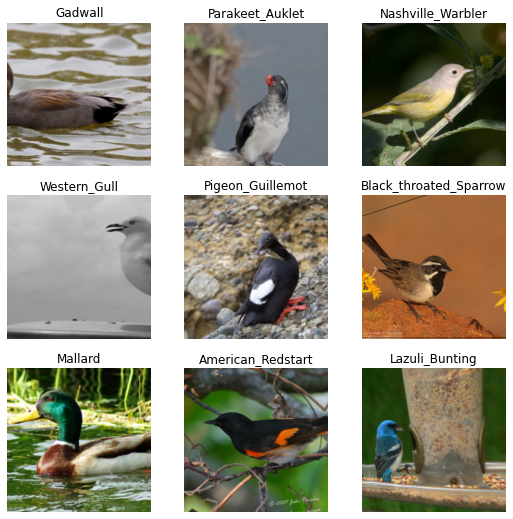

In [ ]:
data.show_batch()


SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.015848932787775993)

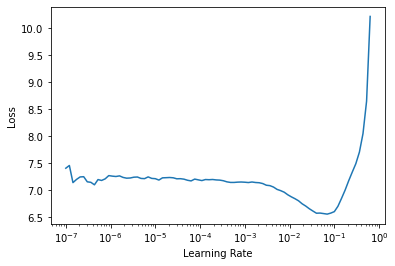

In [ ]:
learner = fv.cnn_learner(data, fv.resnet18, metrics = fv.accuracy)
learner.lr_find()

In [ ]:
learner.fit_one_cycle(3,lr_max=1e-2)

Now with no zoom

In [ ]:
def load_data(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=False, max_rotate=10, max_lighting=0.25,max_zoom=0,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = fv.parent_label,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
data = load_data(birds, img_size=224, batch_size=32)

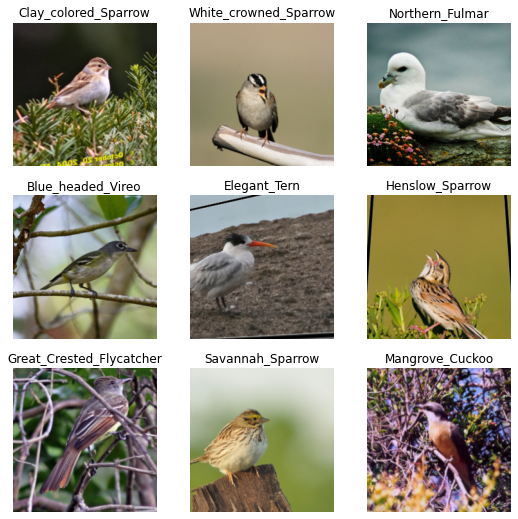

In [ ]:
data.show_batch()


SuggestedLRs(lr_min=0.003981071710586548, lr_steep=1.9054607491852948e-06)

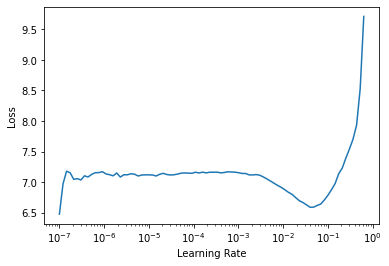

In [ ]:
learner = fv.cnn_learner(data, fv.resnet18, metrics = fv.accuracy)
learner.lr_find()

In [ ]:
learner.fit_one_cycle(3,lr_max=1e-2)

Now i going to change the image size

In [ ]:
def load_data(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=False, max_rotate=10, max_lighting=0.25,max_zoom=1.0,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = fv.parent_label,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
data = load_data(birds, img_size=255, batch_size=32)

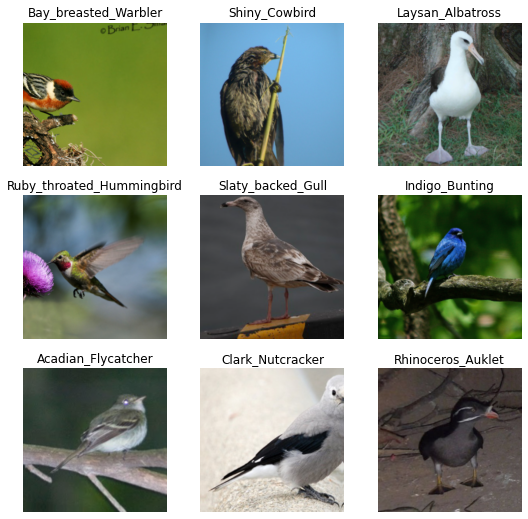

In [ ]:
data.show_batch()


SuggestedLRs(lr_min=0.004786301031708717, lr_steep=0.009120108559727669)

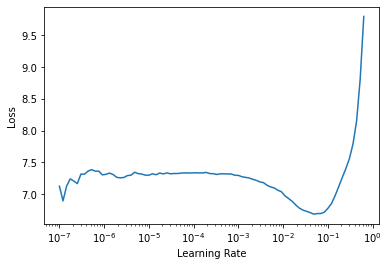

In [ ]:
learner = fv.cnn_learner(data, fv.resnet18, metrics = fv.accuracy)
learner.lr_find()

In [ ]:
learner.fit_one_cycle(3,lr_max=1e-2)

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=6.309573450380412e-07)

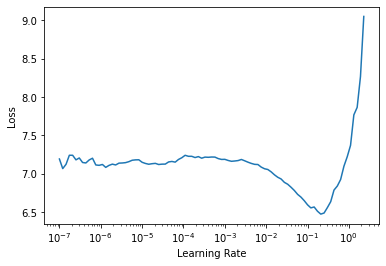

In [ ]:
learnerRanger = fv.cnn_learner(data, fv.resnet18, metrics=fv.accuracy, opt_func=fv.ranger)
learnerRanger.lr_find()

In [ ]:
learnerRanger.fit_one_cycle(3,lr_max=1e-2)

Now i going to play with the arquitectures

SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=1.3182567499825382e-06)

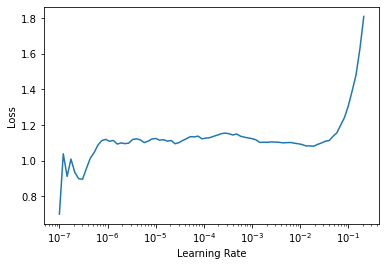

In [ ]:
learner34 = fv.cnn_learner(data, fv.resnet34, metrics=fv.accuracy, opt_func=fv.ranger)
learner34.lr_find()

In [ ]:
learner34.fit_one_cycle(3,lr_max=1e-5)

In [ ]:
learner34.fit_one_cycle(3,lr_max=1e-4)

I hadn't changed the lr_max

In [ ]:
def load_data(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=False, max_rotate=10, max_lighting=0.25,max_zoom=1.0,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = fv.parent_label,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
data = load_data(birds, img_size=255, batch_size=32)

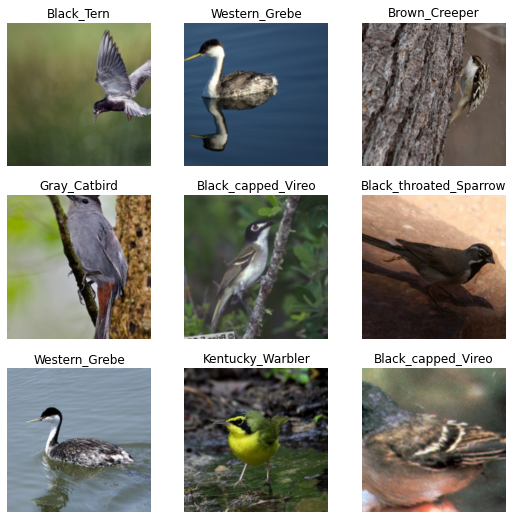

In [ ]:
data.show_batch()


SuggestedLRs(lr_min=0.02089296132326126, lr_steep=6.309573450380412e-07)

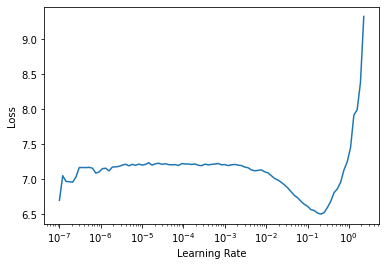

In [ ]:
learner34 = fv.cnn_learner(data, fv.resnet34, metrics=fv.accuracy, opt_func=fv.ranger)
learner34.lr_find()

In [ ]:
learner34.fit_one_cycle(3,lr_max=slice(1e-2,1e-1))

In [ ]:
learner34.fit_one_cycle(3,lr_max=1e-2)

Now  resnet101

In [ ]:
learner101 = fv.cnn_learner(data, fv.resnet101, metrics=fv.accuracy, opt_func=fv.ranger)


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.033113110810518265)

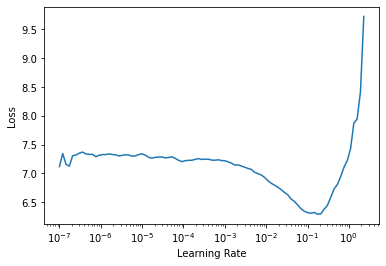

In [ ]:
learner101.lr_find()

In [ ]:
learner101.fit_one_cycle(3,lr_max=1e-2)

In [ ]:
learner101.fit_one_cycle(3,lr_max=slice(1e-2,1e-1))

The best learning ratae was 1e-2 for resnet101.

In [ ]:
def load_data(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=False, max_rotate=10, max_lighting=0.25,max_zoom=1.0,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = fv.parent_label,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
data = load_data(birds, img_size=255, batch_size=32)

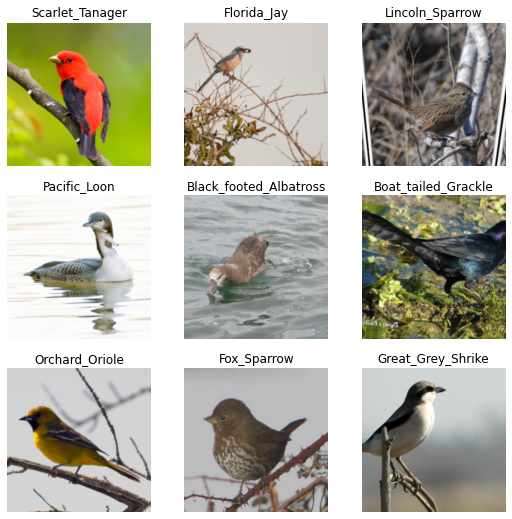

In [ ]:
data.show_batch()


In [ ]:
learner101 = fv.cnn_learner(data, fv.resnet101, metrics=fv.accuracy, opt_func=fv.ranger)


SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.013182567432522774)

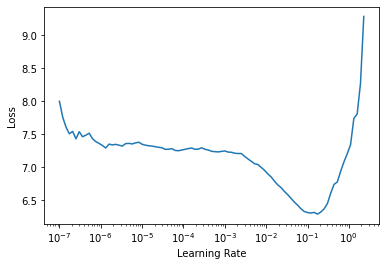

In [ ]:
learner101.lr_find()

In [ ]:
learner101.fit_one_cycle(3,lr_max=1e-2)

In [ ]:
learner101.fit_one_cycle(3,lr_max=slice(1e-2,1e-1))

In [ ]:
learner101.unfreeze()

SuggestedLRs(lr_min=1.0964781722577755e-07, lr_steep=9.12010818865383e-07)

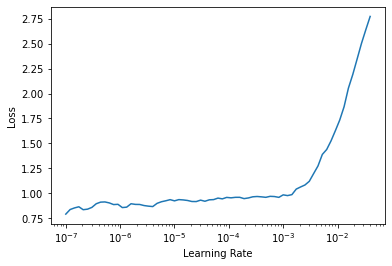

In [ ]:
learner101.lr_find()


In [ ]:
learner101.fit_one_cycle(3,lr_max=1e-4)

In [ ]:
learner101.fit_one_cycle(3,lr_max=1e-5)

In [ ]:
learner101.fit_one_cycle(30,lr_max=1e-4)

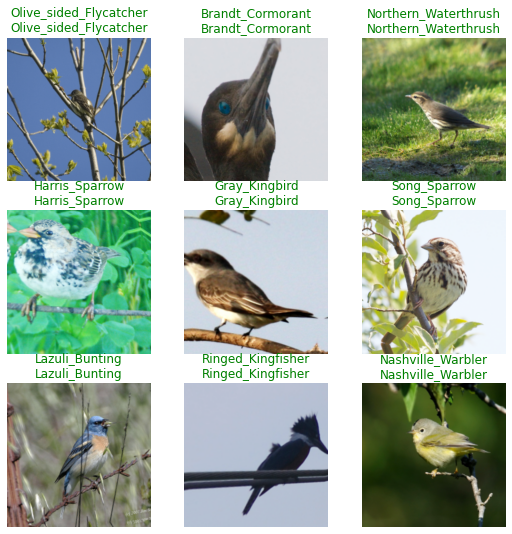

In [ ]:
learner101.show_results(ds_idx=3,dl=data.train,shuffle=True)


In [ ]:
learner101.validate()

(#2) [0.7994809150695801,0.7932344079017639]

In [ ]:
learner101.save('birds0.7932')


Path('models/birds0.7932.pth')

I got  79%  accuracy 

In [ ]:
def load_data(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=False, max_rotate=10, max_lighting=0.25,max_zoom=1.0,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = fv.parent_label,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
data = load_data(birds, img_size=255, batch_size=32)

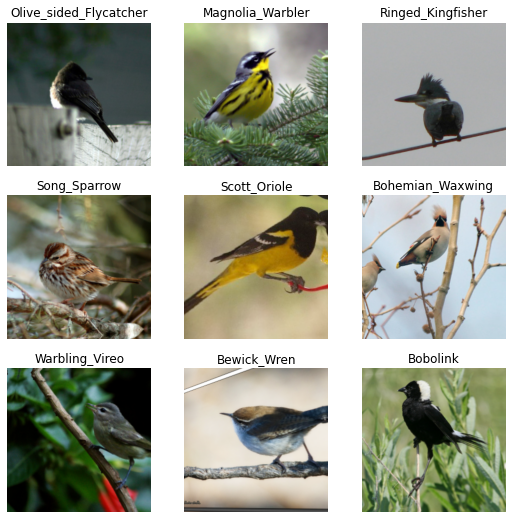

In [ ]:
data.show_batch()


In [ ]:
learner101 = fv.cnn_learner(data, fv.resnet101, metrics=fv.accuracy, opt_func=fv.ranger)


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.05754399299621582)

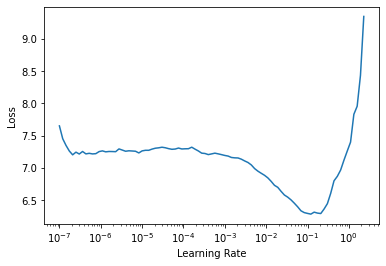

In [ ]:
learner101.lr_find()

In [ ]:
learner101.fit_one_cycle(3,lr_max=1e-2)

In [ ]:
learner101.unfreeze()

SuggestedLRs(lr_min=8.317637839354575e-05, lr_steep=1.9054607491852948e-06)

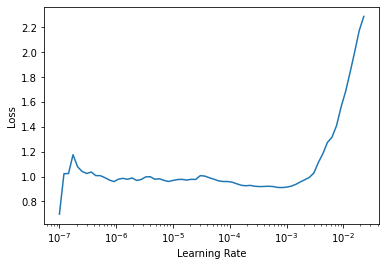

In [ ]:
learner101.lr_find()


In [ ]:
learner101.fit_one_cycle(3,lr_max=1e-4)

In [ ]:
learner101.fit_one_cycle(60,lr_max=1e-4)

In [ ]:
learner101.validate()

(#2) [0.7904440760612488,0.8258543610572815]

In [ ]:
learner101.save('birds0.825')


Path('models/birds0.825.pth')

I got 82.5% accuracy.

In [ ]:
def load_data(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=False, max_rotate=10, max_lighting=0.25,max_zoom=1.0,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = fv.parent_label,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
data = load_data(birds, img_size=255, batch_size=32)

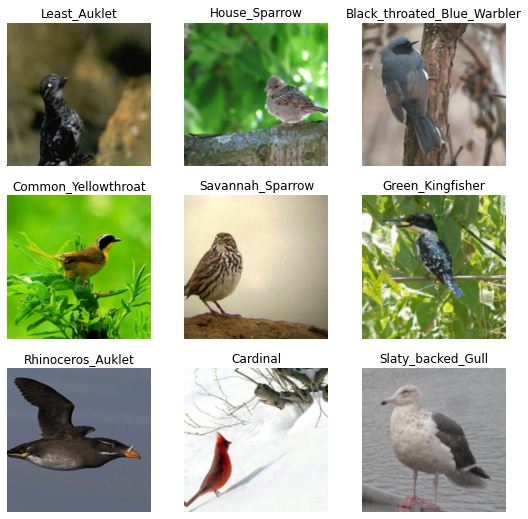

In [ ]:
data.show_batch()


In [ ]:
learner101 = fv.cnn_learner(data, fv.resnet101, metrics=fv.accuracy, opt_func=fv.ranger)


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.02754228748381138)

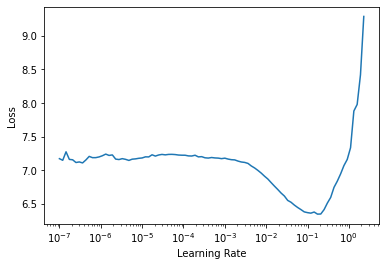

In [ ]:
learner101.lr_find()

In [ ]:
learner101.fit_one_cycle(3,lr_max=1e-2)

In [ ]:
learner101.unfreeze()

SuggestedLRs(lr_min=3.311311274956097e-07, lr_steep=6.309573450380412e-07)

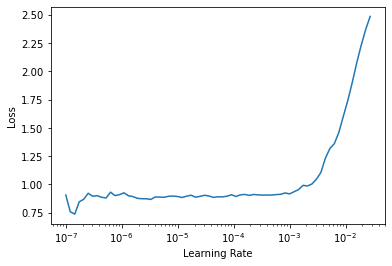

In [ ]:
learner101.lr_find()


In [ ]:
learner101.fit_one_cycle(3,lr_max=1e-4)

In [ ]:
learner101.fit_one_cycle(100,lr_max=1e-4)

In [ ]:
learner101.validate()

(#2) [0.8117020130157471,0.8274076581001282]

In [ ]:
interp = fv.ClassificationInterpretation.from_learner(learner101)

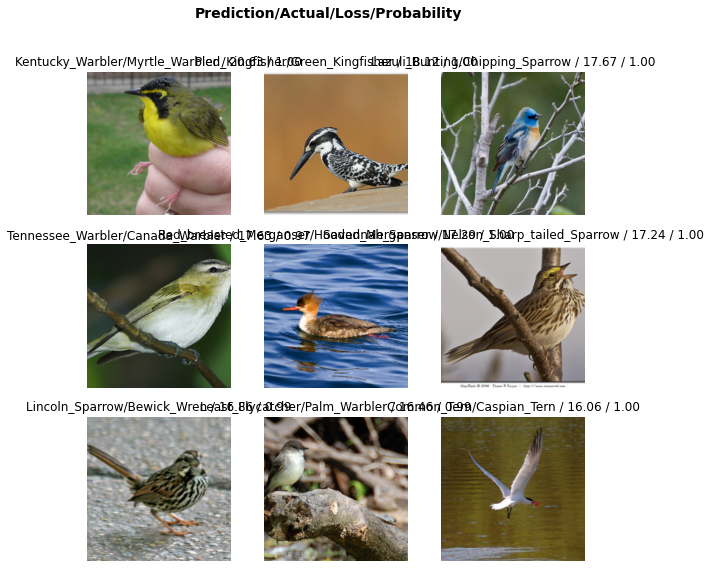

In [ ]:
interp.plot_top_losses(9)